# Advanced Calculus 2020 - Jupyter Workbook 4


# Section 1 - Functions of 3 variables

## Calling the python libraries and functions


* In the cell below the necessary Python libraries and functions are imported, which will be needed for the current work book


In [1]:
import matplotlib.pyplot as plt  ## Library of functions for 2D plotting
from matplotlib import cm as cm  ## Library of functions for ColourMaps 
from mpl_toolkits.mplot3d import Axes3D ## Library of functions for 3D plotting

import numpy as np ## Library of function for numerical work
from numpy import abs, sin, cos, log, exp, tan, cosh, sinh, tanh ## Useful numerical function called from the NUMPY library

## Creating the time-parameter

In [23]:
t=np.linspace(0,10,101)

## Creating the 

In [42]:
def r1(t):
    return 2*t**2

def r2(t):
    return 3*t+1

def r3(t):
    return t/2

Text(0.5,0,'z')

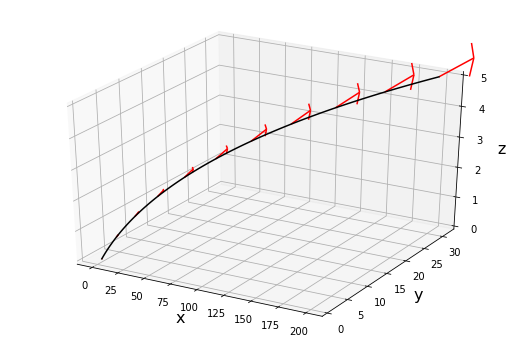

In [61]:
n=10

fig=plt.figure(figsize=(9,6)) # Create a figure environment with a specified size
ax=fig.gca(projection='3d') # Instruct Python to render this figure in 3D

ax.plot(r1(t),r2(t),r3(t),color='black')

ax.quiver(r1(t[::n]),r2(t[::n]),r3(t[::n]),F1(r1(t[::n]),r2(t[::n]),r3(t[::n])),F2(r1(t[::n]),r2(t[::n]),r3(t[::n])),F3(r1(t[::n]),r2(t[::n]),r3(t[::n])),arrow_length_ratio=0.1,color='red') 
ax.set_xlabel('x',size=16) # Set the x-label
ax.set_ylabel('y',size=16) # Set the y-label
ax.set_zlabel('z',size=16) # Set the z-label


#ax.set_xlim(0,400)
#ax.set_ylim(0,70)
#ax.set_zlim(-5,70)

* We see that at each fixed height, the contours are formed by a set of concentric circles in the plane at that height.

* __NOTE:__ There is no particular reason we have to choose fixed $z$-values. We could just as easily fix values of $x$ and plot contours in various $(y,z)-$planes. 

## Exercise 1

__(1)__ Create a Python function to represent 

$$g(x,y,z)=x^2-y^2-z^2$$


__(2)__ Use the $(x,y)$-axis created in __Example 1__ to plot the contours of this function for 

$$z=\pm4, \pm3, \pm2, \pm1, 0.$$



# Section 2 - Paramterised surfaces

* The __level-surfaces__ of a function $f(x,y,z)$ are always defined by

$$f(x,y,z)=k$$,

where $k$ belong to an appropriate set of real numbers (usually we have $-\infty<k<\infty$ or else $0\leq k<\infty$).


* In many cases it is possible to write $z$ as a function of $x$ and $y$ for each value of $k$. This forms a paramteries surface to represent this level set.


### Example 2:

* Find and expression for the parameterised surfaces $z(x,y)$ corresponding to the level-sets

$$x^2+y^2+z^2=k^2$$


* Plot these surface for the values of $k=20$, $k=40$ and $k=80$. 

### Solution

* The paramterised surfaces are given by

$$z(x,y)=\pm\sqrt{k^2-x^2-y^2}.$$


* In fact we see that for each value of $k$, one corresponding to $+\sqrt{\cdot}$ and one corresponding to $-\sqrt{\cdot}$.


* We define a Python function to represent these parameterised surfaces as follows:

In [98]:
def Z_plus(x,y,k):
    return +np.sqrt(k**2-x**2-y**2)


def Z_minus(x,y,k):
    return -np.sqrt(k**2-x**2-y**2)

* The surfaces $+z(x,y,k)$ are as follows.

Text(0.5,0,'z')

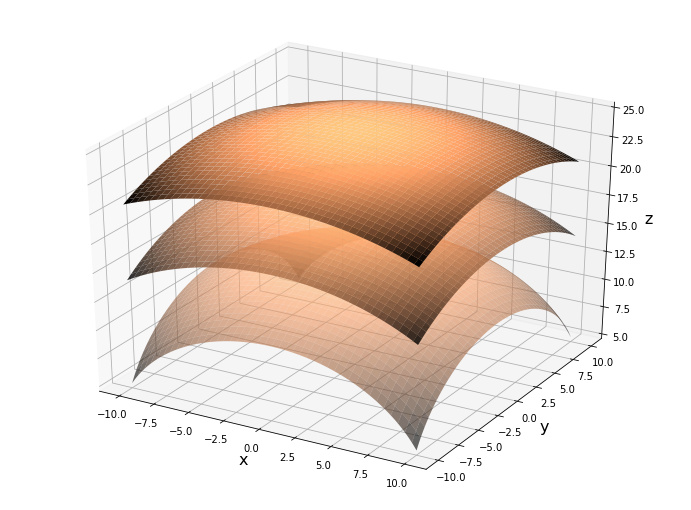

In [100]:
fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection='3d')
for k in [15,20,25]:
    ax.plot_surface(x,y,Z_plus(x,y,k),cmap=cm.copper,alpha=k/25)
ax.set_xlabel('x',size=16) # Set the x-label
ax.set_ylabel('y',size=16) # Set the y-label
ax.set_zlabel('z',size=16) # Set the z-label

* The surfaces $-z(x,y,k)$ are as follows.

Text(0.5,0,'z')

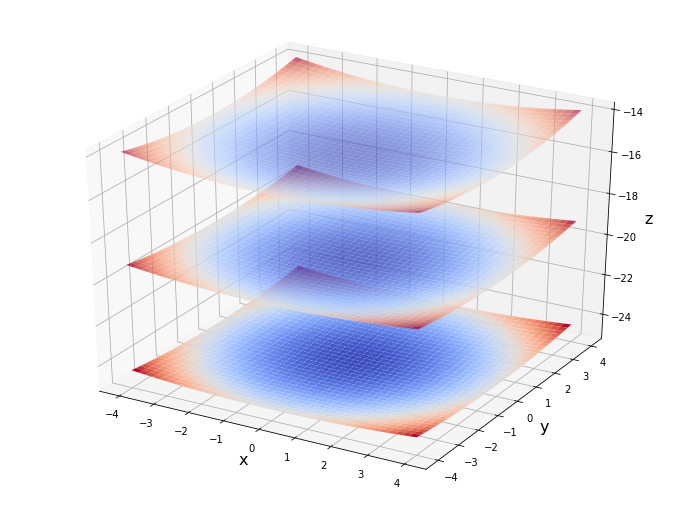

In [154]:
fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection='3d')
for k in [15,20,25]:
    ax.plot_surface(x,y,Z_minus(x,y,k),cmap=cm.coolwarm,alpha=k/25)
ax.set_xlabel('x',size=16) # Set the x-label
ax.set_ylabel('y',size=16) # Set the y-label
ax.set_zlabel('z',size=16) # Set the z-label

## Exercise 2

__(1)__ Find the level-surfaces of the function
$$g(x,y,z)=\frac{z^2}{10+x^2+y^2}$$
in the form of parameterised surfaces $\pm z(x,y,k)$, where $k$ is a constant.



__(2)__ Plot these surface for $k=10$, $k=20$, $k=50$, $k=75$ and $k=100$.


# Section 3 - Gradient fields and tangent planes

* As we saw in Workbook 2, the grandient of a 2-variable function $f(x,y)$ is always $\perp$ to the level-curves of that function.


* Similarly, the grdient field of a 3-variable function $f(x,y,z)$ is always $\perp$ to the level-surfaces of that function.


* To illustrate this we are going to calculate the level-surface of the function

$$f(x,y,z)=\sqrt{x^2+y^2+z^2},$$

which contains the point $P(4,4,2)$.


* The value of the function at this point is 

$$f(4,4,2)=\sqrt{4^2+4^2+2^2}=6.$$



* This means the level-surface is defined by

$$\frac{1}{\sqrt{x^2+y^2+z^2}}=\frac{1}{6}.$$


* Inverting we have

$$\sqrt{x^2+y^2+z^2}=6\Rightarrow x^2+y^2+z^2=36.$$


* Wrting the level-surface in the form of a parametric surface $z(x,y)$ we find 

$$z=\pm\sqrt{36-x^2-y^2}.$$


### The gradient field of $f$


* We calculate the gradient field of $f(x,y,z)$ by hand to give

\begin{equation*}
\begin{aligned}
\nabla f&=\frac{\partial}{\partial x}\left(\sqrt{x^2+y^2+z^2}\right)\hat{\imath}+\frac{\partial}{\partial y}\left(\sqrt{x^2+y^2+z^2}\right)\hat{\jmath}+\frac{\partial}{\partial z}\left(\sqrt{x^2+y^2+z^2}\right)\hat{k}\\
       &=\frac{x}{(x^2+y^2+z^2)^{\frac{1}{2}}}\hat{\imath}+\frac{y}{(x^2+y^2+z^2)^{\frac{1}{2}}}\hat{\jmath}+\frac{z}{(x^2+y^2+z^2)^{\frac{1}{2}}}\hat{k}
\end{aligned}
\end{equation*}


* We can now plot this gradient function on the parameterised level-surfaces as follows:

#### Step 1:

* We define the $x$ and $y$ axes between $\pm4$, and the corresponding $(x,y)-$plane as follows

In [4]:
X=np.linspace(-4,4,201)
Y=np.linspace(-4,4,201)
x,y=np.meshgrid(X,Y)

#### Step 2:

* We define the level-surface as

In [146]:
def z(x,y):
    return np.sqrt(36-x**2-y**2)

* We define the gradient field as

In [152]:
def grad_f(x,y,z):
    return x/np.sqrt(x**2+y**2+z**2)**(1/2),y/np.sqrt(x**2+y**2+z**2)**(1/2),z/np.sqrt(x**2+y**2+z**2)**(1/2)

#### Step 3:

* We plot the level-surface and the gradient field as follows:

Text(0.5,0,'z')

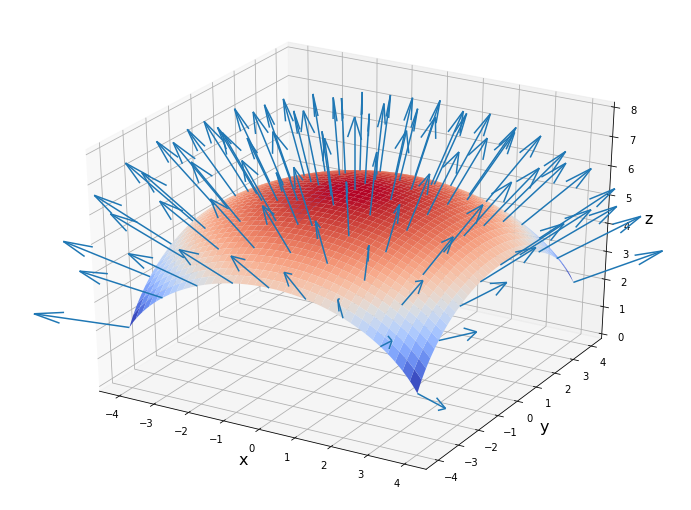

In [151]:
n=25
fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z(x,y),cmap=cm.coolwarm) # The level-surface
ax.quiver(x[::n,::n],y[::n,::n],z(x[::n,::n],y[::n,::n]),grad_f(x[::n,::n],y[::n,::n],z(x[::n,::n],y[::n,::n]))[0],grad_f(x[::n,::n],y[::n,::n],z(x[::n,::n],y[::n,::n]))[1],grad_f(x[::n,::n],y[::n,::n],z(x[::n,::n],y[::n,::n]))[2])
ax.set_zlim(0,8)
ax.set_xlabel('x',size=16) # Set the x-label
ax.set_ylabel('y',size=16) # Set the y-label
ax.set_zlabel('z',size=16) # Set the z-label

#### Remarks:

* The square brackets in __grad_f(x,y,z)[0]__ means we choose the __zeroth component__ of the gradient field (i.e. the component in the $\hat{\imath}$-direction). This is because Python always starts counting from _zero_. The component __[1]__ corresponds to the $\hat{\jmath}$ direction while the component __[2]__ corresponds to the $\hat{k}$-direction. 


* The other square brackets __x[::n,::n]__ means we plot every $\mathbf{n^{th}}$ value in the $x$ and $y$ directions. This is to ensure there are not too many vectors in the plot. We do it like this so that we can play around with the value of $\mathbf{n}$ more easily at the start of the plot, to give us the best picture.

## Exercise 3

__(1)__ Find the level-surface of the function 
$$h(x,y,z)= \cos(x)\sin(y)+z.$$ 
at the point $P(1,0,1)$ in the form of a paramtrice surface $z(x,y)$. 

__(2)__ Create a Python function to represent this level-surface $z(x,y)$.


__(3)__ Find the gradient field of the function $h(x,y,z)$.


__(4)__ Create a Python function to represent this gradient field $\nabla h$.


__(5)__ Plot the surface $z(x,y)$ and the gradient field on this level-surface. use the same $(x,y)$-plane as Exampl 3.

In [1]:
def z(x,y):
    return 1-cos(x)*sin(y)

In [5]:
def grad_f(x,y,z):
    return -sin(x)*sin(y),cos(x)*cos(y),1

Text(0.5,0,'z')

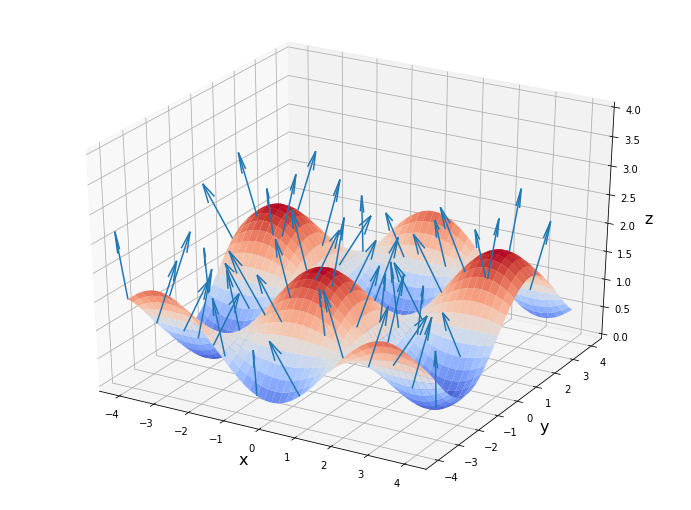

In [10]:
n=30
fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z(x,y),cmap=cm.coolwarm) # The level-surface
ax.quiver(x[::n,::n],y[::n,::n],z(x[::n,::n],y[::n,::n]),grad_f(x[::n,::n],y[::n,::n],z(x[::n,::n],y[::n,::n]))[0],grad_f(x[::n,::n],y[::n,::n],z(x[::n,::n],y[::n,::n]))[1],grad_f(x[::n,::n],y[::n,::n],z(x[::n,::n],y[::n,::n]))[2])
ax.set_zlim(0,4)
ax.set_xlabel('x',size=16) # Set the x-label
ax.set_ylabel('y',size=16) # Set the y-label
ax.set_zlabel('z',size=16) # Set the z-label